# Data4Good - UPF Cookie Monsters

In our project, we've utilized the DWD Weather Data East Germany API to access accurate and up-to-date meteorological data from the eastern region of Germany. This API offers detailed information on weather conditions such as temperature, precipitation, wind speed, and more. By integrating this API into our project, we were able to obtain reliable data to enhance the accuracy and functionality of our applications or analyses related to weather in this specific area.

In [ ]:
!pip install wetterdienst   # downloading the API

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.6/254.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: polars
   

In [ ]:
from wetterdienst import Wetterdienst

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from datetime import datetime

from wetterdienst import Resolution, Period

from wetterdienst.provider.dwd.observation import (
    DwdObservationRequest,
    DwdObservationDataset,
    DwdObservationPeriod,
    DwdObservationResolution,
)

API = Wetterdienst(provider="dwd", network="observation")

# From the entire dataset, we will only need a few variables from 2021,
# as the dataset you provided us with was from 2021 and it would make sense to use that

# When analyzing the 2021 data, we observe that we have few variables with values.
# Therefore, we will use those that make the most sense for our study. In our case, we will use 'sunshine' and 'precipitation'.


rain = DwdObservationRequest(
    parameter=['precipitation_index'],
    resolution=DwdObservationResolution.HOURLY,
    start_date=datetime(2021, 1, 1),
    end_date=datetime(
        2021, 12, 31
    ),
).filter_by_name(name="Berlin-Tempelhof")


rain_data = rain.values.all().df

# For now, we're going to create two DataFrames with the same variable so that we can later perform a join.
# In the case of the 'rainy' DataFrame, we're only interested in the 'precipitation index', which tells us
# whether it has rained or not during that hour, and the 'date', which will help us identify the time and date of the data in question

rainy = rain_data['value']
date = rain_data['date']
rainy_df = pd.DataFrame({'rainy': rainy, 'date': date})

display(rainy_df)


# Now we do the same for the 'sunshine' DataFrame. We'll keep the 'sunshine_duration' variable and the 'date'. The 'sunshine_duration'
# variable is a value in seconds indicating how long the sun has been shining during that hour, so we'll need to perform a conversion later on

sunshine = DwdObservationRequest(
    parameter=['sunshine_duration'],
    resolution=DwdObservationResolution.HOURLY,
    start_date=datetime(2021, 1, 1),
    end_date=datetime(
        2021, 12, 31
    ),
).filter_by_name(name="Berlin-Tempelhof")


sunshine_data = sunshine.values.all().df  # .dropna()
sunshine = sunshine_data['value']
date = sunshine_data['date']
sunshine_df = pd.DataFrame({'sunshine': sunshine, 'date': date})

display(sunshine_df)



,rainy,date
0,0.0,2021-01-01 00:00:00
1,0.0,2021-01-01 01:00:00
2,0.0,2021-01-01 02:00:00
3,0.0,2021-01-01 03:00:00
4,0.0,2021-01-01 04:00:00
...,...,...
8732,1.0,2021-12-30 20:00:00
8733,1.0,2021-12-30 21:00:00
8734,1.0,2021-12-30 22:00:00
8735,1.0,2021-12-30 23:00:00


,sunshine,date
0,NaN,2021-01-01 00:00:00
1,NaN,2021-01-01 01:00:00
2,NaN,2021-01-01 02:00:00
3,0.0,2021-01-01 03:00:00
4,0.0,2021-01-01 04:00:00
...,...,...
8732,0.0,2021-12-30 20:00:00
8733,NaN,2021-12-30 21:00:00
8734,NaN,2021-12-30 22:00:00
8735,NaN,2021-12-30 23:00:00


In [ ]:
# Joining the datasets by the time

join_df = pd.merge(rainy_df,sunshine_df)
display(join_df)

,rainy,date,sunshine
0,0.0,2021-01-01 00:00:00,NaN
1,0.0,2021-01-01 01:00:00,NaN
2,0.0,2021-01-01 02:00:00,NaN
3,0.0,2021-01-01 03:00:00,0.0
4,0.0,2021-01-01 04:00:00,0.0
...,...,...,...
8732,1.0,2021-12-30 20:00:00,0.0
8733,1.0,2021-12-30 21:00:00,NaN
8734,1.0,2021-12-30 22:00:00,NaN
8735,1.0,2021-12-30 23:00:00,NaN


In [ ]:
print(join_df['rainy'].sum())


1905.0


In [ ]:
# Data cleaning check to create a cloudy variable

nan_count = join_df.isna().sum()  # we count the null values to save them in a variable
non_nan_count = join_df.count()   # we count the non-null values to save them in a variable
# Now we create a Dataframe
nan_counter_df = pd.DataFrame({'Column Name': nan_count.index, 'NaN Count': nan_count.values, 'Non-NaN Count': non_nan_count.values})
display(nan_counter_df)

,Column Name,NaN Count,Non-NaN Count
0,rainy,13,8724
1,date,0,8737
2,sunshine,2265,6472


In [ ]:
# Posar el sunshine a 0
count = ((join_df["sunshine"].isna()) & (join_df["rainy"] == 1) ).sum()
print(count)
print((join_df["sunshine"] == 0 ).sum())


430
3851


In [ ]:
# We can consider null values in 'sunshine' and rainy = 1 as rainy.
# In other words, for the 'sunshine' values, we'll assign 0, ensuring consistency in the data

join_df['sunshine'] = join_df.apply(lambda row: 0 if (row['rainy'] == 1) & pd.isna(row['sunshine']) else row['sunshine'], axis = 1)
display(join_df.tail())
print((join_df["sunshine"] == 0 ).sum())
print((join_df["sunshine"]).sum())


,rainy,date,sunshine
8732,1.0,2021-12-30 20:00:00,0.0
8733,1.0,2021-12-30 21:00:00,0.0
8734,1.0,2021-12-30 22:00:00,0.0
8735,1.0,2021-12-30 23:00:00,0.0
8736,1.0,2021-12-31 00:00:00,0.0


4281
5700480.0


In [ ]:
# Filling the null values of sunshine as the same as the last value observed
join_df['sunshine'] = join_df['sunshine'].fillna(method='ffill')

In [ ]:
# Data cleaning check to create a cloudy variable

nan_count = join_df.isna().sum()  # we count the null values to save them in a variable
non_nan_count = join_df.count()   # we count the non-null values to save them in a variable
# Now we create a Dataframe
nan_counter_df = pd.DataFrame({'Column Name': nan_count.index, 'NaN Count': nan_count.values, 'Non-NaN Count': non_nan_count.values})
display(nan_counter_df)

,Column Name,NaN Count,Non-NaN Count
0,rainy,13,8724
1,date,0,8737
2,sunshine,3,8734


In [ ]:
join_df["rainy"] = join_df["rainy"].fillna(0)
join_df["sunshine"] = join_df["sunshine"].fillna(0)
display(join_df.head(5))

,rainy,date,sunshine
0,0.0,2021-01-01 00:00:00,0.0
1,0.0,2021-01-01 01:00:00,0.0
2,0.0,2021-01-01 02:00:00,0.0
3,0.0,2021-01-01 03:00:00,0.0
4,0.0,2021-01-01 04:00:00,0.0


In [ ]:
print(join_df['rainy'].sum())
print((join_df['sunshine'] > 0 ).sum())

1905.0
2621


In [ ]:
# Data cleaning check to create a cloudy variable

nan_count = join_df.isna().sum()  # we count the null values to save them in a variable
non_nan_count = join_df.count()   # we count the non-null values to save them in a variable
# Now we create a Dataframe
nan_counter_df = pd.DataFrame({'Column Name': nan_count.index, 'NaN Count': nan_count.values, 'Non-NaN Count': non_nan_count.values})
display(nan_counter_df)

,Column Name,NaN Count,Non-NaN Count
0,rainy,0,8737
1,date,0,8737
2,sunshine,0,8737


In [ ]:
# With the 3 variables [date, sunny, rainy], we can add a third variable to represent cloudy days.
# We'll consider hours with more than 40 minutes of sunshine as 'sunny'.
# Therefore, those hours that are neither 'rainy' nor 'sunny' will be classified as 'cloudy'

columns_name = ['date', 'sunny', 'rainy', 'cloudy']
weather_df = pd.DataFrame(columns = columns_name )
weather_df['date'] = join_df['date']
weather_df['sunny'] = join_df['sunshine'].apply(lambda x: 1 if x > 2400 else 0)
weather_df['rainy'] = join_df['rainy'].where(weather_df['sunny']!= 1, other = 0)

display(weather_df.head())
have = ((weather_df['rainy'] == 1 ) & (weather_df['sunny'] == 1)).any()  # checking
print(weather_df['rainy'].sum())


weather_df['cloudy'] = weather_df.apply(lambda row: 1 if (row['rainy'] == 0) & (row['sunny'] == 0) else 0, axis = 1)

have = ((weather_df['rainy'] == 1 ) & (weather_df['cloudy'] == 1) ).any()  # checking
print(have)
have = ((weather_df['sunny'] == 1 ) & (weather_df['cloudy'] == 1) ).any()  # checking
print(have)

,date,sunny,rainy,cloudy
0,2021-01-01 00:00:00,0,0.0,NaN
1,2021-01-01 01:00:00,0,0.0,NaN
2,2021-01-01 02:00:00,0,0.0,NaN
3,2021-01-01 03:00:00,0,0.0,NaN
4,2021-01-01 04:00:00,0,0.0,NaN


1888.0
False
False


In [ ]:
display(weather_df)


,date,sunny,rainy,cloudy
0,2021-01-01 00:00:00,0,0.0,1
1,2021-01-01 01:00:00,0,0.0,1
2,2021-01-01 02:00:00,0,0.0,1
3,2021-01-01 03:00:00,0,0.0,1
4,2021-01-01 04:00:00,0,0.0,1
...,...,...,...,...
8732,2021-12-30 20:00:00,0,1.0,0
8733,2021-12-30 21:00:00,0,1.0,0
8734,2021-12-30 22:00:00,0,1.0,0
8735,2021-12-30 23:00:00,0,1.0,0


In [ ]:
weather_df['date'] = pd.to_datetime(weather_df['date'])



# Crear una nueva columna para la hora como valor entero
weather_df['hour'] = weather_df['date'].dt.hour

# Formatear la fecha como '%d.%m.%Y'
weather_df['date'] = weather_df['date'].dt.strftime('%d.%m.%Y')

# Reordenar las columnas
weather_df = weather_df[['date', 'hour', 'sunny', 'rainy', 'cloudy']]

print(weather_df)

            date  hour  sunny  rainy  cloudy
0     01.01.2021     0      0    0.0       1
1     01.01.2021     1      0    0.0       1
2     01.01.2021     2      0    0.0       1
3     01.01.2021     3      0    0.0       1
4     01.01.2021     4      0    0.0       1
...          ...   ...    ...    ...     ...
8732  30.12.2021    20      0    1.0       0
8733  30.12.2021    21      0    1.0       0
8734  30.12.2021    22      0    1.0       0
8735  30.12.2021    23      0    1.0       0
8736  31.12.2021     0      0    1.0       0

[8737 rows x 5 columns]


In [ ]:
count_rainy = (weather_df['rainy'] == 1).sum()
count_cloudy = (weather_df['cloudy'] == 1).sum()
count_sunny = (weather_df['sunny'] == 1).sum()


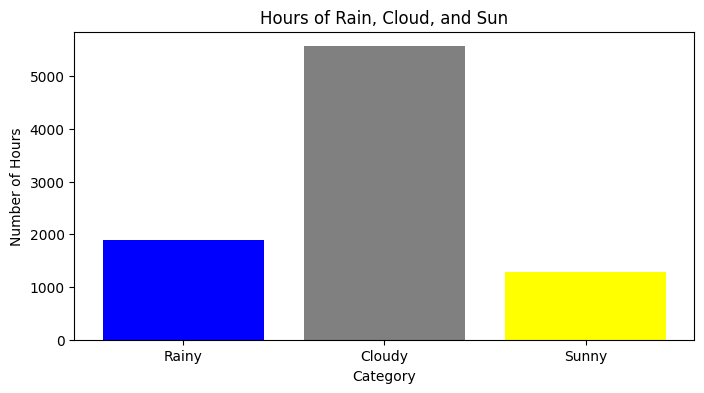

In [ ]:
# Data
counts = [count_rainy, count_cloudy, count_sunny]
categories = ['Rainy', 'Cloudy', 'Sunny']

# Create the bar plot
plt.figure(figsize=(8, 4))
plt.bar(categories, counts, color=['blue', 'gray', 'yellow'])

# Titles and labels
plt.title('Hours of Rain, Cloud, and Sun')
plt.xlabel('Category')
plt.ylabel('Number of Hours')
plt.show()

In [ ]:
columns_to_check = ['sunny', 'rainy', 'cloudy']

# Iterate through rows and check sum of specified columns
for index, row in weather_df.iterrows():
    row_sum = row[columns_to_check].sum()
    if row_sum != 1:
        print(f"Sum of row {index} for columns {columns_to_check} is {row_sum} which is different from 1")

In [ ]:
def day_of_the_week(fecha):
    fecha_obj = datetime.strptime(fecha, '%Y-%m-%d')
    dia_semana = fecha_obj.strftime('%A')
    return dia_semana

In [ ]:
weather_df = weather_df.rename(columns={'data': 'Date'})


In [ ]:
weather_df

,date,hour,sunny,rainy,cloudy
0,01.01.2021,0,0,0.0,1
1,01.01.2021,1,0,0.0,1
2,01.01.2021,2,0,0.0,1
3,01.01.2021,3,0,0.0,1
4,01.01.2021,4,0,0.0,1
...,...,...,...,...,...
8732,30.12.2021,20,0,1.0,0
8733,30.12.2021,21,0,1.0,0
8734,30.12.2021,22,0,1.0,0
8735,30.12.2021,23,0,1.0,0


In [ ]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['month'] = weather_df['date'].dt.month

weather_df['date'] = weather_df['date'].dt.date

weather_df['day'] = weather_df['date'].apply(lambda x:day_of_the_week(str(x)))

In [ ]:
weather_df.drop('date', axis=1, inplace=True)

weather_df = weather_df[['day', 'month', 'sunny', 'rainy', 'cloudy']]

print(weather_df)


In [ ]:
weather_df.to_csv('weather_data.csv', index=False)
